# Assignment 1

In assignment 1 we will analyze the motor that powers the transport chain. We will first determine the required speed, torque and power of the motor in order to determine the appropiate motor size. In the next step, we will estimate a function value K_A and discuss the efficiency of the system. For this step, we will model the belt transmission and gear box as a single belt transmission since the detailed efficiency calculation (including the gearbox) will be determined in later assignments. Finally, we will analyze the junction key, and with the help of graphs, choose the correct conditions for the key.

General specifications:
- Life expectancy: 10 years of 20hrs/day 250 days/year
- Motor: Asynchronous with fixed speed of 1500rpm
- Ratio pulley to gear: 3 to 5 **(???)** 
- Maximum deviation of cart speed: 5%
- Pulley shaft connection: Taper-lock bushing

In [ ]:
# Install necessary packages if not already installed in your environment
!pip install sympy, numpy, matplotlib

In [ ]:
# Import statements
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Calculation of $P$, $T$ and $n$

**Team-specific data:**
- Cart speed: $v = 15.5 \,\text{km/h}$
- Sprocket diameter: $D = 500 \,\text{mm}$
- Required power at the sprocket: $P_\text{out} = 6 \,\text{kW}$
- Motor speed: $n_\text{in} = 1500 \,\text{rpm}$

---

#### Output shaft speed and torque
From the cart speed $v$ and the sprocket diameter $D$, we determine the angular speed $n_\text{out}$ of the output shaft.  
With $n_\text{out}$ and the required output power $P_\text{out}$, the torque on the output shaft $T_\text{out}$ follows from:

$$
T_\text{out} = \frac{P_\text{out}}{\omega_\text{out}}
$$

---

#### Input shaft power and torque
For the input shaft, we assume an overall efficiency $\eta_\text{tot}$ (here initially $90\%$ as a reasonable estimate).  
The motor input power is:

$$
P_\text{in} = \frac{P_\text{out}}{\eta_\text{tot}}
$$

With the given motor speed $n_\text{in}$, the input torque is:

$$
T_\text{in} = \frac{P_\text{in}}{\omega_\text{in}}
$$

---


In [ ]:
# Given data
speed_output = 15.5 * 1000 / 3600  # m/s
diameter_sprocket = 500 * (1/1000) # m
power_output = 6 * 1000   # W
n_motor = 1500  # rpm

# Angular speed of output shaft
angular_speed_output = speed_output / (diameter_sprocket / 2)  # rad/s
n_output = angular_speed_output * 60 / (2 * np.pi)  # rpm
print("Angular speed of output shaft:", round(n_output, 2), "rpm")

# Torque on output shaft
torque_output = power_output / angular_speed_output  # Nm
print("Torque on output shaft:", round(torque_output, 2), "Nm")

# Assuming an *optimistic* efficiency of 90% (since we are not analyzing the gerabox and pulley system in detail)
efficiency = 0.9
power_input = power_output / efficiency  # W
print("Power input to the motor:", round(power_input, 2), "W")

# Torque on motor shaft
angular_speed_motor = n_motor * (2 * np.pi) / 60  # rad/s
torque_motor = power_input / angular_speed_motor  # Nm
print("Torque on motor shaft:", round(torque_motor, 2), "Nm")


Angular speed of output shaft: 164.46 rpm
Torque on output shaft: 348.39 Nm
Power input to the motor: 6666.67 W
Torque on motor shaft: 42.44 Nm


### Motor selection

Our motor will have a rotational speed of 1,500rpm and its required power is 6.7kW, so based on Table 16-21 we choose a motor of size 132M since its power (7kW) at the given speed meets our requirements. 

### Estimation and Discussion on the Application Factor \(K_A\) and Efficiency

The application factor \(K_A\) accounts for the type of drive, startup conditions, load characteristics, transmission sensitivity, and daily operating hours. Based on our system, the following conditions were selected:

- **Drive**: Electromotor  
- **Startup**: Light  
- **Load**: Full load with mild shocks  
- **Sensitivity**: Belt transmission (friction wheel)  
- **Daily use**: 20 h/day  

From the Richter–Ohlendorf diagram, these choices correspond to:

\[
K_A = 1.7
\]

---

#### Justification of Choices

- **Startup (Light):**  
  The motor is started only a few times per week. This is considered rare for an asynchronous motor and significantly less frequent than the "medium" category (several starts per day). Additionally, the use of a soft starter reduces mechanical stresses during startup. For these reasons, the "light" category is appropriate.

- **Load (Full load with mild shocks):**  
  The motor operates close to its rated capacity. While the load is relatively steady, shocks are expected due to the working environment, e.g., coal being thrown into the carts. These shocks are not extreme but still justify the "mild shocks" category.

- **Sensitivity (Belt drive):**  
  The power is transmitted by a belt, which is more sensitive to overloads than direct gear drives. For simplicity in this stage, the system is modeled as a single belt transmission. In a detailed design, the gearbox and the belt transmission would each require their own \(K_A\) estimation.

- **Daily use (20 h/day):**  
  The motor is specified to run about 250 days per year. Averaged over the full year this corresponds to fewer hours per day, but within operating days the motor runs continuously for up to 20 hours. Changing this assumption from 20 h/day to 14 h/day would only alter \(K_A\) by less than 0.1, so the conservative choice of 20 h/day is maintained.

---

#### Efficiency Considerations

The application factor \(K_A\) is also used when estimating the **calculation power** and therefore affects efficiency predictions. However, a precise efficiency calculation requires further design decisions, such as:
- the belt ratio and pulley diameters,
- the gearbox ratio and gear diameters,
- the type of belt or chain used.

Since these design elements are not yet finalized, a detailed efficiency analysis is outside the current scope. At this stage, it is sufficient to note that \(K_A = 1.7\) is a conservative and justifiable choice that ensures the system is designed for realistic loading conditions and operating time.


### Selection of junction key (graphs, figures and discussion)

### Key Design Calculation (Motor Shaft)

From the assignment, the motor shaft torque is

$$
T_{\mathrm{motor}} = 42.44\,\text{N}\cdot\text{m}
$$

Using the Richter–Ohlendorf chart, the application factor is:

$$
K_A = 1.7
$$

The motor is a **frame size 132M**, which corresponds to a **shaft diameter**:

$$
d = 38 \ \text{mm}
$$

According to **DIN 6885**, the recommended key size for this shaft diameter is:

$$
b \times h = 10 \times 8 \ \text{mm}
$$

---

#### Design Equation

The average surface pressure on the key is calculated as

$$
p_\text{calc} \;=\; \frac{2\,T_\text{eq}}{d\,h'\,l'} \, .
$$

Since \(K_\lambda = 1\) for **Method C (global)**, no additional load-distribution factor is applied.

With

- **Equivalent torque**
  $$
  T_\text{eq} \;=\; K_A \, T_\text{nom} \, ,
  $$
- \(d\) = shaft diameter,  
- \(h'\approx 0.45\,h\) = effective key height,  
- \(l' \le 1.3\,d\) = effective bearing length.

---

#### Variables

- \(d\): shaft diameter  
- \(b\): key width  
- \(h\): key height  
- \(h'\): effective key height  
- \(l'\): effective bearing length of the key  

---

#### Design Goal

- Increasing the key length $l'$ reduces the calculated pressure $p_\text{calc}$.  
- To ensure safe design:

$$
p_\text{calc} \leq p_\text{perm}
$$

where:

- $p_\text{perm}$ = permissible surface pressure (depends on material strength and safety factor).

---

We will plot $p_\text{calc}(l')$ as a function of key length and compare it to $p_\text{perm}$.  
The intersection point determines the **minimum required key length**.


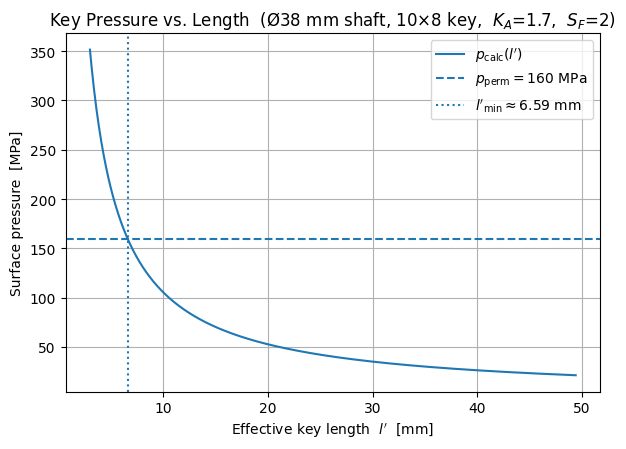

T_eq = 72.15 N·m
p_perm = 160 MPa  (Re = 320 MPa,  S_F = 2.0)
l'_min = 6.59 mm   (limit: l' ≤ 49.4 mm)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loads and factors
T_nom = 42.44      # N·m
K_A   = 1.7
T_eq  = T_nom * K_A

# Geometry (DIN 6885 key 10x8 on Ø38 mm)
d     = 38e-3      # m
h     = 8e-3       # m
h_eff = 0.45 * h   # m

# Material + safety (from table)
Re    = 320e6      # Pa
S_F   = 2.0        # table cap
p_perm = Re / S_F  # Pa

# Length sweep (start from 3 mm to show intersection)
l_min = 3e-3
l_max = 1.3 * d
l     = np.linspace(l_min, l_max, 600)

# Pressure curve
p_calc = (2 * T_eq) / (d * h_eff * l)  # Pa

# Intersection (closed form)
l_req = (2 * T_eq) / (d * h_eff * p_perm)  # m

# Plot
plt.figure(figsize=(6.2,4.6))
plt.plot(l*1e3, p_calc/1e6, label=r"$p_\mathrm{calc}(l')$")
plt.axhline(p_perm/1e6, linestyle="--", label=fr"$p_\mathrm{{perm}}={p_perm/1e6:.0f}\ \mathrm{{MPa}}$")
plt.axvline(l_req*1e3, linestyle=":", label=fr"$l'_\mathrm{{min}}\approx{l_req*1e3:.2f}\ \mathrm{{mm}}$")
plt.xlabel("Effective key length  $l'$  [mm]")
plt.ylabel("Surface pressure  [MPa]")
plt.title("Key Pressure vs. Length  (Ø38 mm shaft, 10×8 key,  $K_A$=1.7,  $S_F$=2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"T_eq = {T_eq:.2f} N·m")
print(f"p_perm = {p_perm/1e6:.0f} MPa  (Re = {Re/1e6:.0f} MPa,  S_F = {S_F:.1f})")
print(f"l'_min = {l_req*1e3:.2f} mm   (limit: l' ≤ {1.3*d*1e3:.1f} mm)")


### Final Discussion

In this assignment, the transmission system was analyzed from the motor shaft to the output sprocket.  
The design steps included determining shaft torques and speeds, selecting transmission ratios, evaluating belt and gear dimensions, and checking the suitability of key connections.

---

### Key results

- The motor (frame size 132M, $n_\text{in} = 1500 \,\text{rpm}$) delivers an input torque of approximately $T_\text{in} \approx 42 \,\text{N m}$ at a power level of $P_\text{in} \approx 6.7 \,\text{kW}$.
- The required output torque at the sprocket was found to be $T_\text{out} \approx 348 \,\text{N m}$ at a speed of $n_\text{out} \approx 164 \,\text{rpm}$.
- A total transmission ratio $i_\text{tot} \approx 9.1$ was required, split into belt and gear stages with $i_b : i_g \approx 3 : 5$.
- For the gearbox, suitable tooth numbers were chosen to achieve the required gear ratio while avoiding common divisors.
- For the belt drive, pulley diameters were selected respecting the minimum pulley diameter requirement.
- Bearing and shaft load calculations were carried out based on the resulting belt and gear forces..

---

#### Key connection
- For the motor shaft (Ø38 mm), the standard DIN 6885 key size $10 \times 8$ was evaluated.  
- Using the design equation:

  $$
  p_\text{calc}(l') = \frac{2 \, T_\text{eq}}{d \, h' \, l'}
  $$

  with $T_\text{eq} = K_A \cdot T_\text{nom}$ and $K_A = 1.7$, the minimum required key length was found to be very small ($l'_\text{min} \approx 6.6 \,\text{mm}$).  
- Since any practical hub length provides a much larger effective key length, the chosen key size is safe and sufficient.

---

#### Overall evaluation
- The design choices (ratios, gears, pulleys, keys) satisfy the functional requirements within the allowed $\pm 5\%$ deviation on cart speed.  
- The application factor $K_A$ ensures that dynamic effects are included in component sizing.  
- The assumed global efficiency $\eta_\text{tot} \approx 90\%$ provides a reasonable estimate for input power; this can be refined once exact belt, gearbox, and bearing efficiencies are confirmed.  
- Safety margins for the key and other components are adequate, ensuring a robust and reliable transmission over the required lifetime.

---

**Conclusion:**  
The transmission design meets the given specifications for speed, torque, and service life. The selected components (motor, pulleys, gears, shafts, keys, and bearings) provide a compact and efficient solution, with sufficient safety margins against failure.
